In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('diabetes.csv')


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
data.corr()['Outcome'].sort_values()

BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
DiabetesPedigreeFunction    0.173844
Pregnancies                 0.221898
Age                         0.238356
BMI                         0.292695
Glucose                     0.466581
Outcome                     1.000000
Name: Outcome, dtype: float64

<Axes: xlabel='BMI', ylabel='Glucose'>

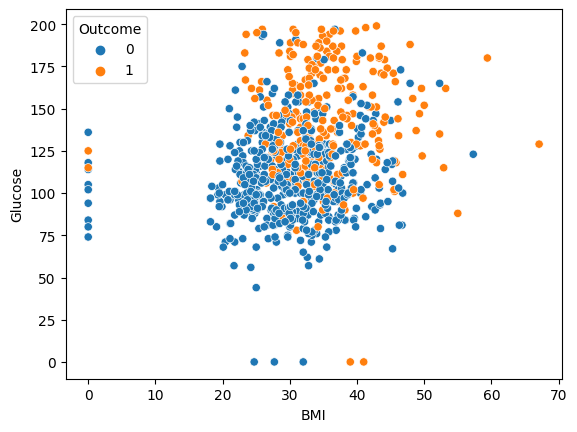

In [13]:
sns.scatterplot(x=data['BMI'],y=data['Glucose'],hue=data['Outcome'])

In [14]:
X = data.drop(['Outcome'],axis=1)

In [15]:
y = data['Outcome']

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
X_val, X_test, y_val, y_test = train_test_split(X_eval, y_eval, test_size=0.5, random_state=42)

In [19]:
print(len(X_train),len(X_val),len(X_test),len(X))

537 115 116 768


In [20]:
from sklearn.tree import DecisionTreeClassifier

In [137]:
dtc = DecisionTreeClassifier(random_state=42,criterion='log_loss')

In [138]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier(criterion='log_loss', random_state=42)

In [139]:
y_prd_val = dtc.predict(X_val)

In [140]:
from sklearn.metrics import classification_report , confusion_matrix

In [141]:
print(classification_report(y_val,y_prd_val))

              precision    recall  f1-score   support

           0       0.84      0.79      0.82        78
           1       0.61      0.68      0.64        37

    accuracy                           0.76       115
   macro avg       0.72      0.74      0.73       115
weighted avg       0.76      0.76      0.76       115



In [142]:
confusion_matrix(y_val,y_prd_val)

array([[62, 16],
       [12, 25]], dtype=int64)

In [143]:
from sklearn.ensemble import RandomForestClassifier

In [144]:
rfc = RandomForestClassifier()

In [145]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [146]:
y_prd_val = rfc.predict(X_val)

In [147]:
print(classification_report(y_val,y_prd_val))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        78
           1       0.59      0.59      0.59        37

    accuracy                           0.74       115
   macro avg       0.70      0.70      0.70       115
weighted avg       0.74      0.74      0.74       115



In [148]:
final_prd = rfc.predict(X_test)

In [149]:
print(classification_report(y_test,final_prd))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80        73
           1       0.67      0.60      0.63        43

    accuracy                           0.74       116
   macro avg       0.72      0.71      0.72       116
weighted avg       0.74      0.74      0.74       116

